In [1]:
from datetime import datetime
from dateutil import parser
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
enron_df = pd.read_csv('datasets/explored/enron-emails-explored.csv')
mal_df = pd.read_csv('datasets/explored/malicious-emails-explored.csv')

# Top Charsets

In [3]:
def getPieChartCharset(series):
    used_charset = series.groupby('charset', dropna=False).charset.count()
    used_charset = used_charset.sort_values(ascending=False)
    top_x = used_charset[:5]
    others = pd.Series(used_charset[5:].sum(), index=['others'])
    top_charsets = pd.concat([top_x, others])
    top_charsets.rename = "Top Charsets"
    top_charsets.plot(kind='pie', figsize=(7,7), fontsize=20, ylabel='Top Charsets',subplots=True)

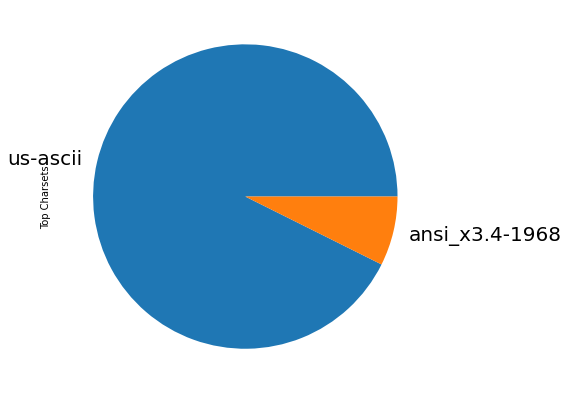

In [4]:
getPieChartCharset(enron_df)

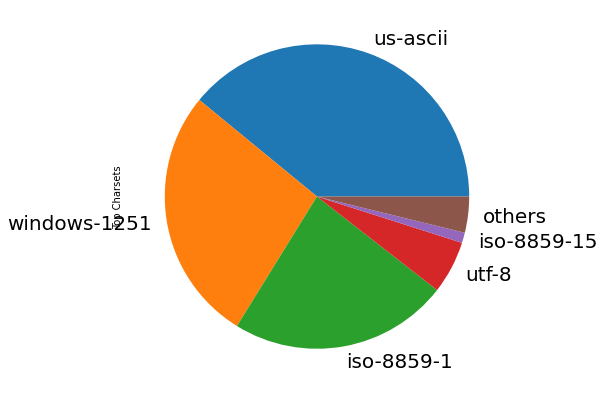

In [5]:
getPieChartCharset(mal_df)

# Top Domain used to send email

In [6]:
def getPieChartDomain(series):
    top_domain = series.groupby('from_domain', dropna=False).from_domain.count()
    top_domain = top_domain.sort_values(ascending=False)
    top_x = top_domain[:5]
    others = pd.Series(top_domain[5:].sum(), index=['others'])
    top_domain = pd.concat([top_x, others])
    top_domain.rename = "Top Charsets"
    top_domain.plot(kind='pie', figsize=(7,7), fontsize=16, ylabel='Top 5 Email Domain',subplots=True, legend=True)

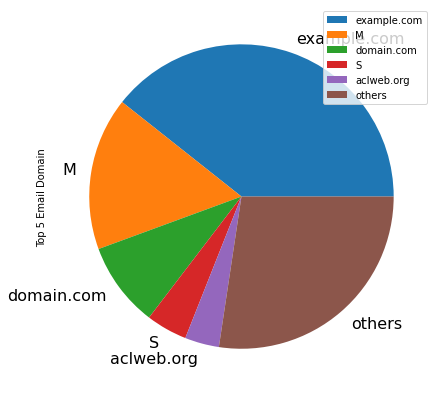

In [7]:
getPieChartDomain(mal_df)

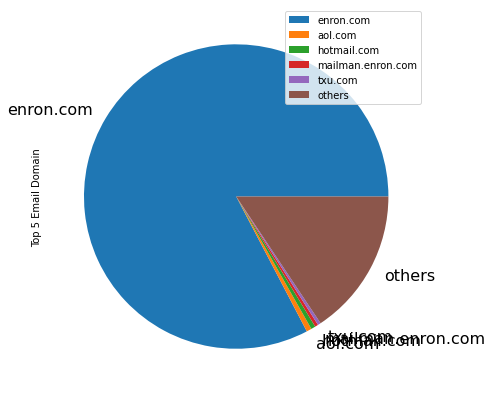

In [8]:
getPieChartDomain(enron_df)

## Range of periods when the email is send

In [9]:
date = mal_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

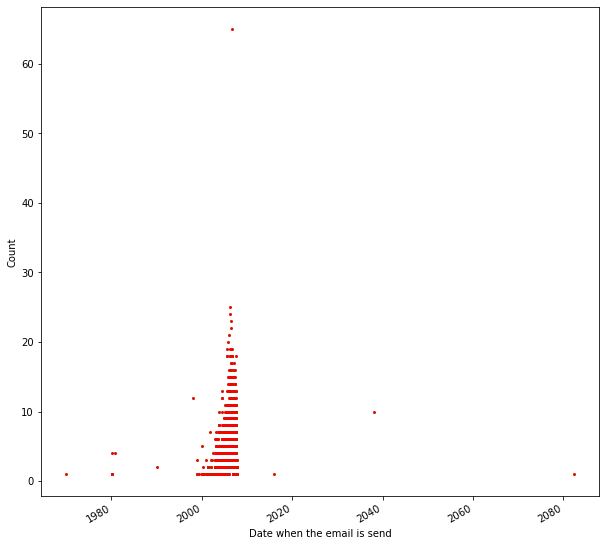

In [10]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Date when the email is send')
plt.show()

In [11]:
date = enron_df.parsed_date.apply(lambda date: parser.parse(date).date())
date_emails = date.groupby(date, dropna=False).count()

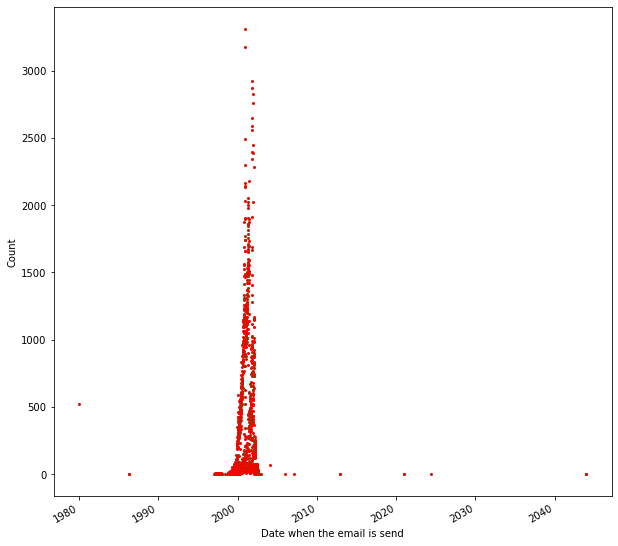

In [12]:
x = date_emails.index
y = date_emails.values

fig, ax = plt.subplots()
ax.plot_date(x, y, markerfacecolor='green', markeredgecolor='red', ms=2)
fig.autofmt_xdate()
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Date when the email is send')
plt.show()

## Lenght of email subject

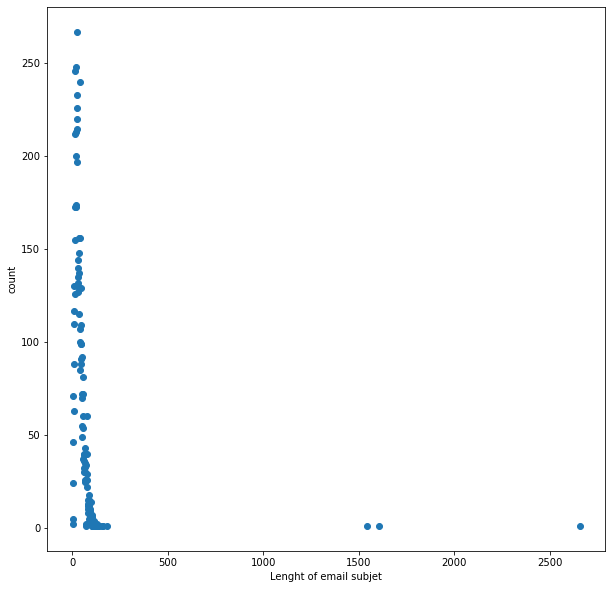

In [13]:
subject = mal_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

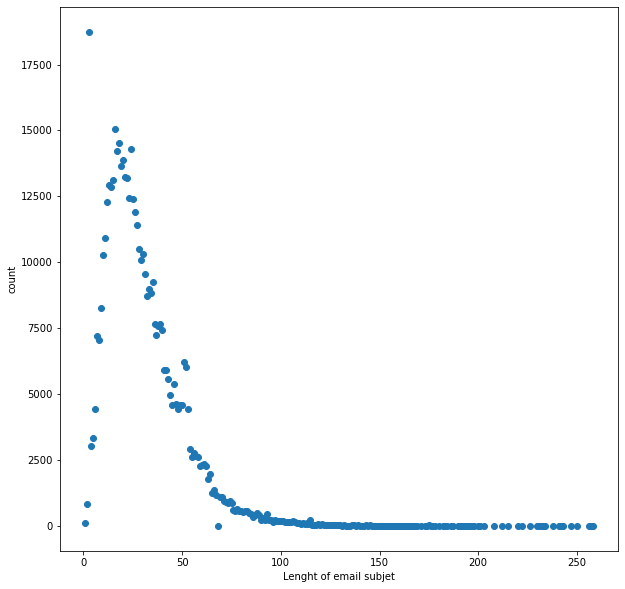

In [14]:
subject = enron_df.subject.apply(lambda s: len(f'{s}'))
subject = subject.groupby(subject, dropna=False).count()
y = subject.values
x = subject.index

fig, ax = plt.subplots()
ax.scatter(x, y)
fig.set_size_inches(10,10)
plt.ylabel('count')
plt.xlabel('Lenght of email subjet')
plt.show()

## No of URLs found in message body

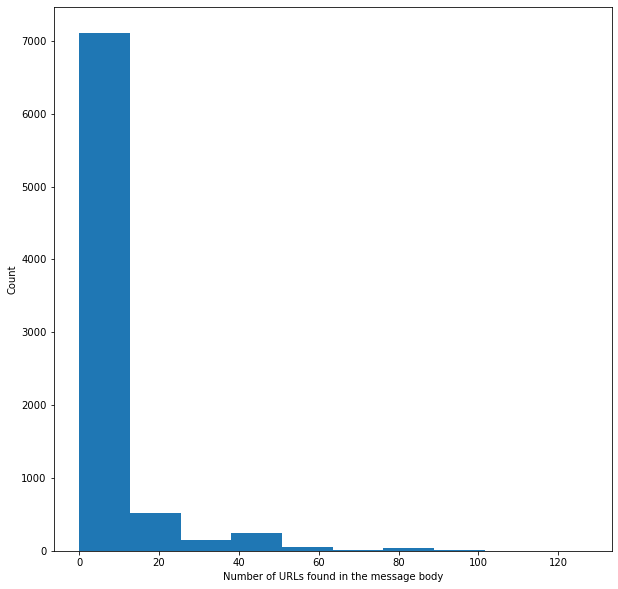

In [15]:
x = mal_df.URLs_in_message.values

fig, ax = plt.subplots()
ax.hist(x)
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()

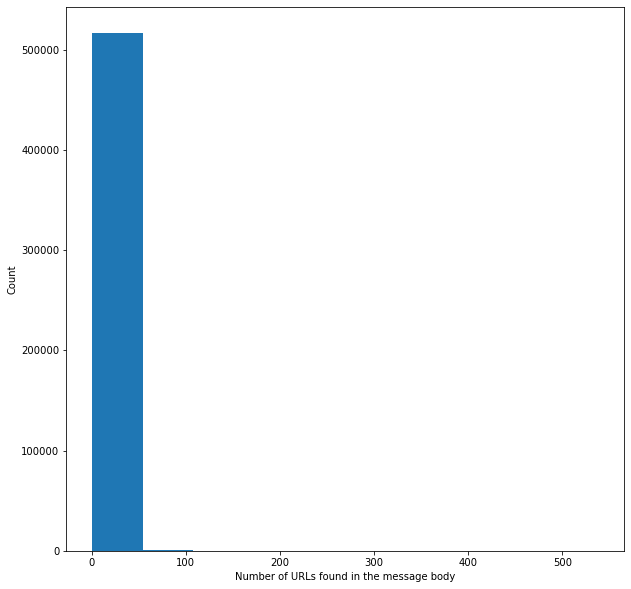

In [16]:
x = enron_df.URLs_in_message.values

fig, ax = plt.subplots()
ax.hist(x)
fig.set_size_inches(10,10)
plt.ylabel('Count')
plt.xlabel('Number of URLs found in the message body')
plt.show()